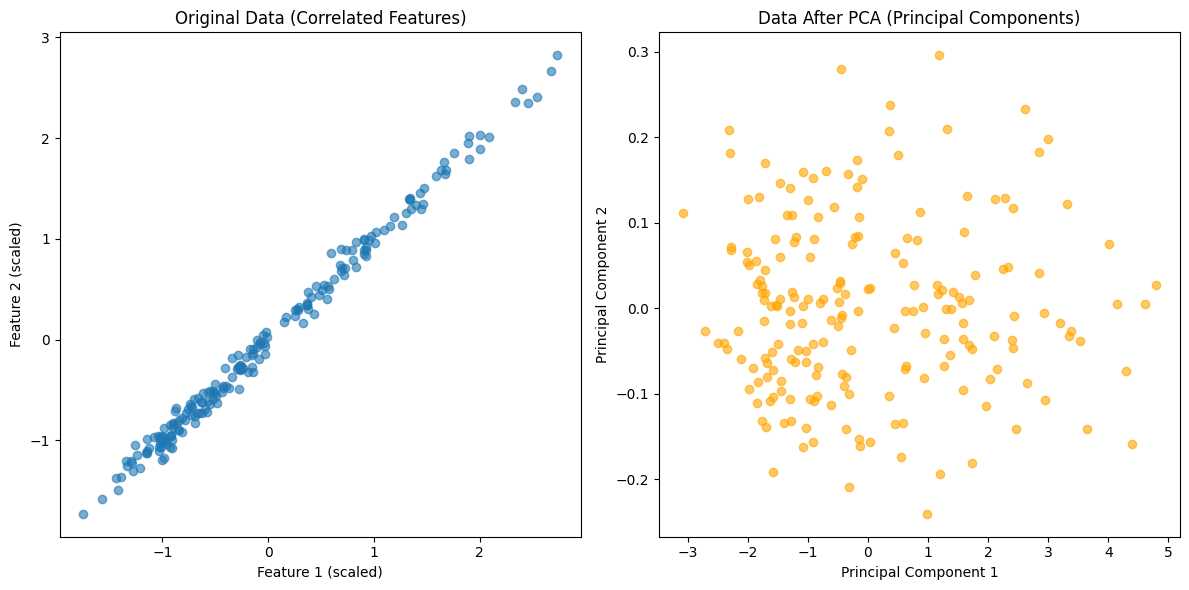

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# Generate synthetic 3D data with some correlation
np.random.seed(42)
X, _ = make_classification(n_samples=200, n_features=3, n_informative=3, 
                           n_redundant=0, n_clusters_per_class=1)

# Add some correlation
X[:, 1] = X[:, 0] * 0.8 + np.random.normal(0, 0.1, size=X.shape[0])
X[:, 2] = X[:, 0] * -0.6 + np.random.normal(0, 0.1, size=X.shape[0])

# Standardize data
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot original 3D data projected to 2D via PCA
plt.figure(figsize=(12, 6))

# Original data (first two features)
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.6)
plt.title("Original Data (Correlated Features)")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")

# PCA transformed data
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6, color='orange')
plt.title("Data After PCA (Principal Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.tight_layout()
plt.show()
